# Latar Belakang
YouTube memiliki daftar video yang paling banyak ditonton di platformnya. Youtube menggunakna beberapa kombinasi faktor seperti mengukur jumlah penayangan, share, komentar, dan likes. Dalam dataset ini, berisikan video-video trending di YouTube pada tahun 2017-2018 dan juga keterangan-keterangan seperti berapa penayangan, likes, dislikes, dan keterangan lainnya.

# Rumusan Masalah
 ingin melihat faktor apa saja yang dapat mempengaruhi seberapa populer sebuah video di YouTube. Hal tersebut dapat dilakukan untuk memaksimalkan reach dari video dan membuat video tersebut populer. Sehingga muncul lah pertanyaan berikut:

**Faktor apa saja yang dapat mempengaruhi populernya sebuah video?**

**Bagaimana karakteristik dari video trending di youtube?**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset


In [3]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\bootcamp\Modul 2\Capstone 2\USvideos.csv")
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [4]:
# melihat informasi data yang ada
df.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [5]:
df.info()
print('Jumlah kolom pada dataset: ', len(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
# lihat missing values
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

<Axes: >

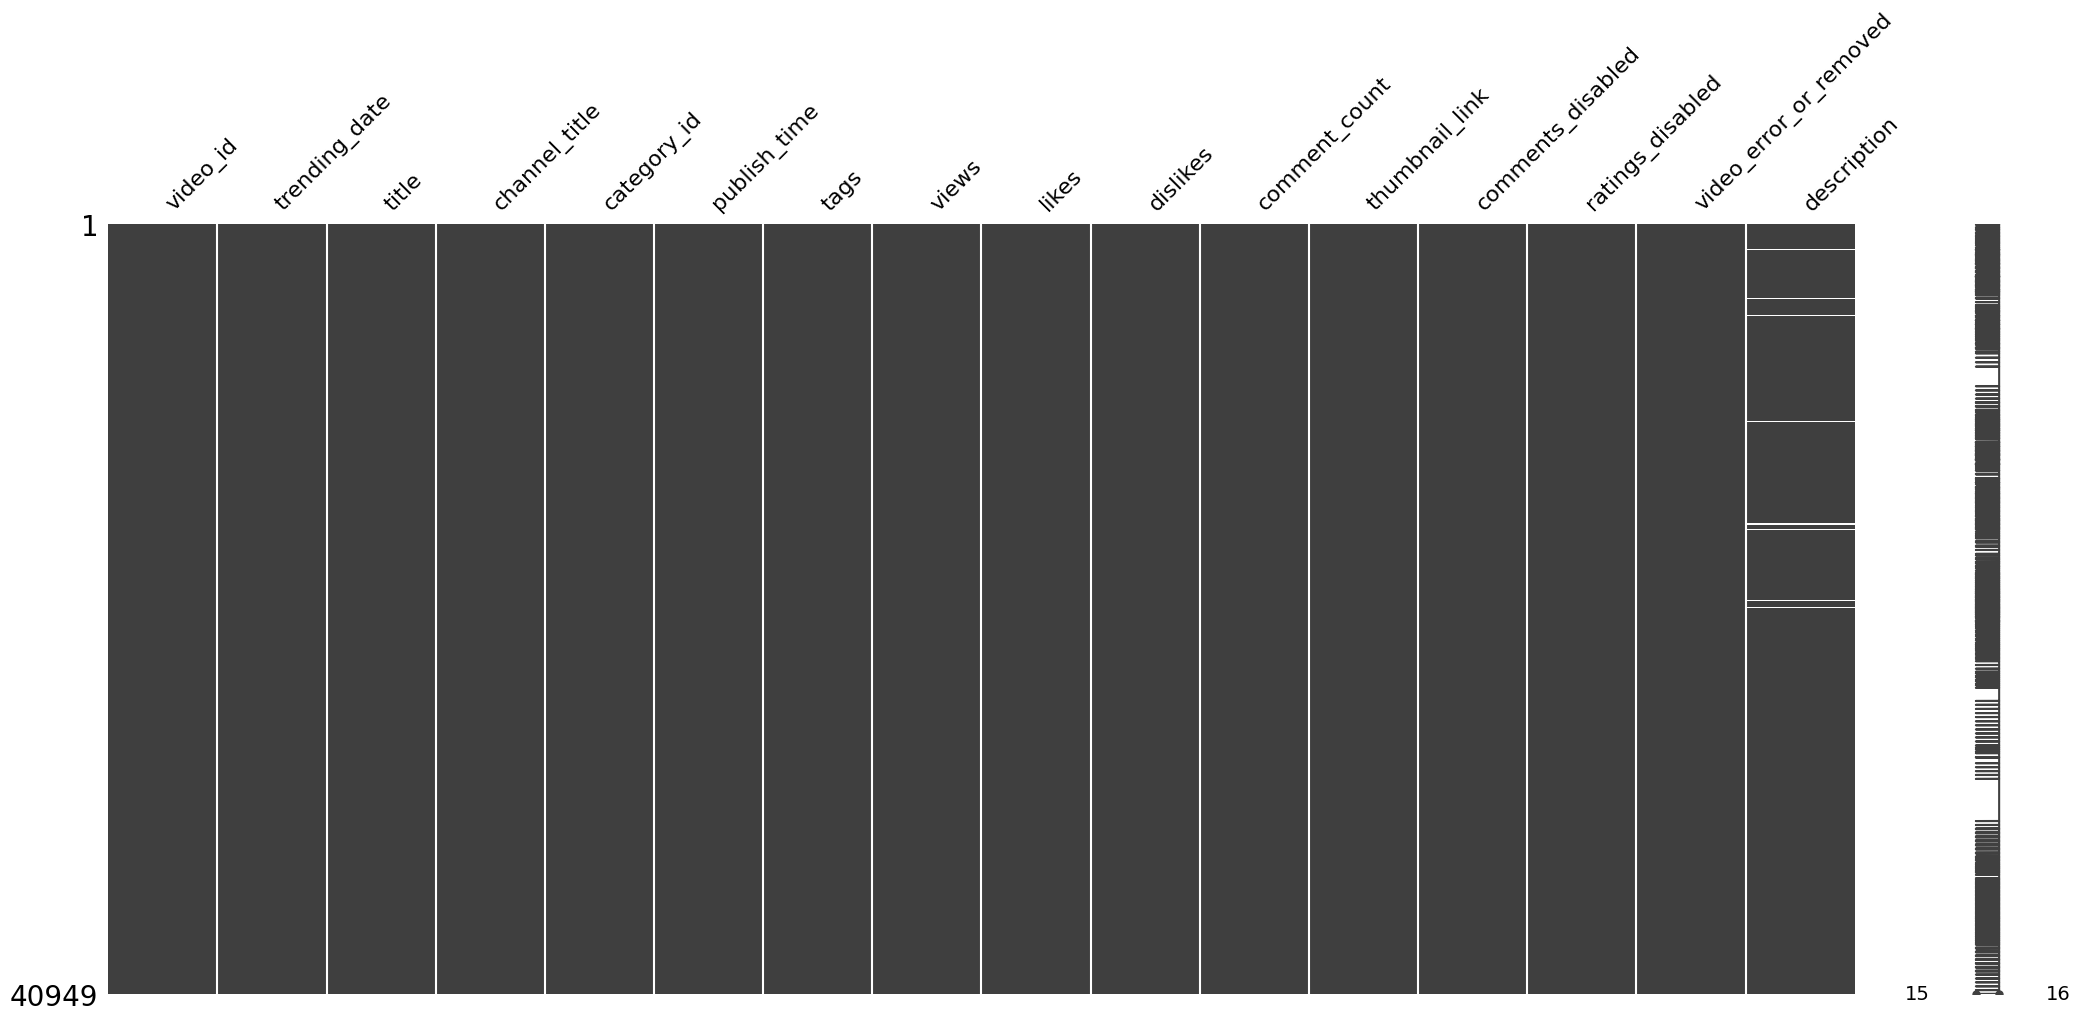

In [7]:
import missingno as msno

msno.matrix(df)

In [8]:
# persentase missing values pada kolom 
df['description'].isna().sum()/df.shape[0]*100

1.3919753840142617

Kesimpulan:
- terdapat 40949 baris dan 16 kolom pada dataset
- Terdapat 6351 video di dalam dataset (adanya count yang menununjukkan 40949 video berarti bahwa terdapat video yang trending lebih dari satu hari)
- Hampir semua data dalam dataset tidak mempunyai missing value
- Kolom Description mempunyai persentase sebear 1.3 missing value
- Kolom Description tidak akan digunakan dalam analisa data sehingga kemuningkinan besar untuk dihapus saja


# Data Cleaning
Missing value pada kolom description dapat dianggap sebagai video yang tidak diberikan description sehingga:
- Dapat dibuat kolom baru yang berisikan ada komentar pada video atau tidak

In [9]:
df['description'] = df['description'].fillna('')

In [10]:
df.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [11]:
df['no_desc'] = df.description.apply(lambda x: True if x == '' else False)
df['no_desc'].value_counts()

False    40379
True       570
Name: no_desc, dtype: int64

**Kesimpulan**
- Kolom desc_disabled berisikan 570 video yang tidak mempunyai deskripsi

Adanya missing values tersebut mungkin karena memang ada video yang tidak mempunyai deskripsi video atau di non-aktifkan. Dikarenakan hal tersebut maka diasumsikan ada video yang tidak mempunyai deskripsi.

Memasukkan kategori pada dataset
- Kategori video terpisah dalam file yang berbeda (JSON), sehingga harus dimasukkan berdasarkan category_id yang ada dalam dataset ini 

In [12]:
df['category_id'].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

In [13]:
df.loc[(df["category_id"] == 1),"category"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category"] = 'Music'
df.loc[(df["category_id"] == 15),"category"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category"] = 'Sport'
df.loc[(df["category_id"] == 19),"category"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category"] = 'Education'
df.loc[(df["category_id"] == 28),"category"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 43),"category"] = 'Shows'

In [14]:
category = df['category'].unique()
jum_cat = df['category'].nunique()

print(category)
print(f'Jumlah kategori video trending pada dataset: {jum_cat}')

['People and Blogs' 'Entertainment' 'Comedy' 'Science and Technology'
 'Film and Animation' 'News and Politics' 'Sport' 'Music'
 'Pets and Animals' 'Education' 'How to and Style' 'Cars and Vehicles'
 'Travel and Events' 'Gaming' 'Non Profits and Activism' 'Shows']
Jumlah kategori video trending pada dataset: 16


# Membersihkan time formatting

Di dalam dataset ada dua kolom yang berisikan waktu, yaitu kolom trending_date dan publish_time. Kedua kolom tersebut masih mempunyai format object bukan datetime dan juga masih mempunyai time formatting yang salah.

In [15]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,no_desc,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,False,People and Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False,Entertainment


In [16]:
df['publish_time'].unique()

array(['2017-11-13T17:13:01.000Z', '2017-11-13T07:30:00.000Z',
       '2017-11-12T19:05:24.000Z', ..., '2018-06-13T05:27:27.000Z',
       '2018-06-12T16:03:58.000Z', '2018-06-13T09:00:06.000Z'],
      dtype=object)

Memperbaiki dan mengubah tipe data trending_date dan publish_time menjadi datetime pada dataset

In [17]:
df['publish_date'] = df['publish_time'].str.slice(stop=10)
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,no_desc,category,publish_date
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,False,People and Blogs,2017-11-13
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False,Entertainment,2017-11-13


In [18]:
from datetime import datetime

# Mengubah format tanggal kolom trending_date
df['trending_date'] = df['trending_date'].apply(lambda x: '20' + x)
df['trending_date'] = df['trending_date'].apply(lambda x: x.replace('.', '-'))
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%d-%m')

# Mengubah format tanggal kolom publish_time
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

df['publish_date'] = pd.to_datetime(df['publish_date'], format= '%Y-%m-%d')

df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  datetime64[ns]
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,no_desc,category,publish_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,False,People and Blogs,2017-11-13
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False,Entertainment,2017-11-13


**Drop kolom yang tidak digunakan**

In [19]:
df = df.drop(['thumbnail_link', 'video_id', 'category_id', ], axis=1)

Kolom tersebut di hapus karena tidak dapat di analisa lebih lanjut.

# Statistik deskriptif

In [20]:
# statistk deskriptif pada data numerikal
df.describe()

,views,likes,dislikes,comment_count
count,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [21]:
# statistik deskriptif pada data kategorikal
df.describe(include='object')

,title,channel_title,tags,description,category
count,40949,40949,40949,40949,40949
unique,6455,2207,6055,6902,16
top,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,[none],,Entertainment
freq,30,203,1535,570,9964


Dari tabel diatas dapat disimpulkan bahwa:
- Dari segi rata-rata, views mempunyai rata-rata sebesar 2,360,785.
- Likes mempunyai rata-rata sebesar 74,263.
- Dislikes mempuyai rata-rata sebesar 3711.40.
- Comment mempunyai rata-rata sebesar 8445.80.

# Melihat apakah dataset memiliki distribusi yang normal

Melihat apakah distribusi data pada views, likes, dislikes dan comments adalah normal

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4036\1766752710.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['views'], kde=True, ax=axes[0,0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4036\1766752710.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['likes'], kde=True, ax=axes[0,1])


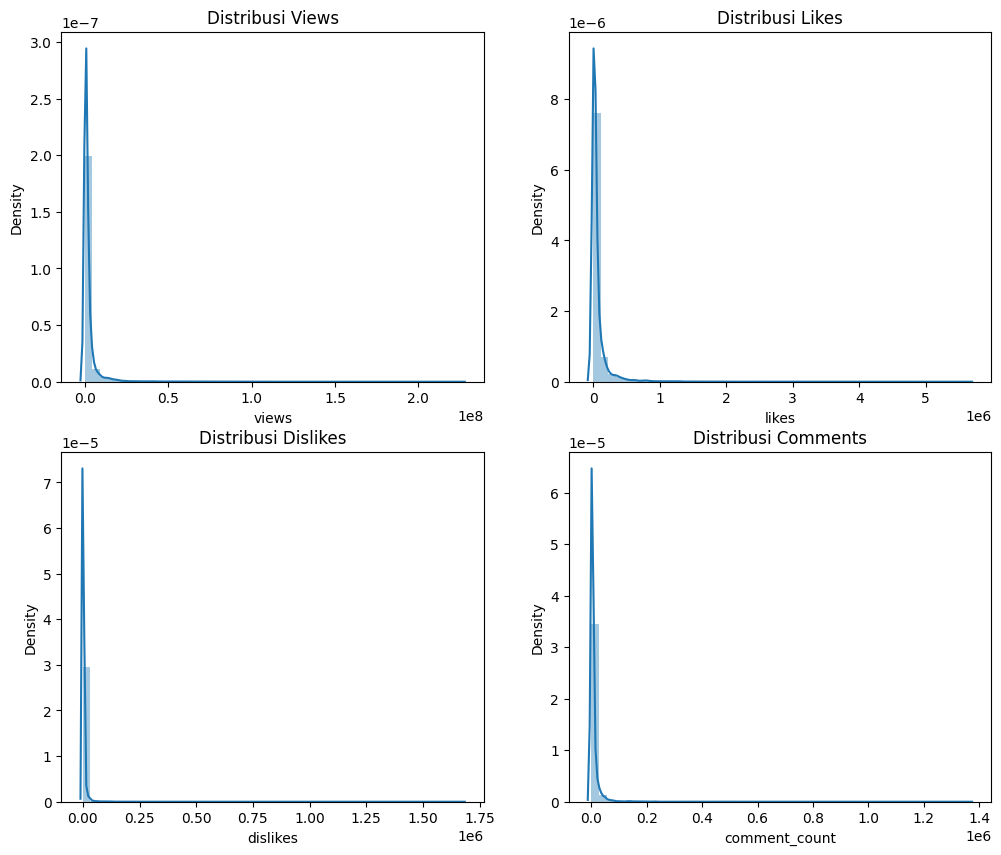

In [22]:
fig, axes = plt.subplots(2,2,figsize = (12,10))
sns.distplot(df['views'], kde=True, ax=axes[0,0])
sns.distplot(df['likes'], kde=True, ax=axes[0,1])
sns.distplot(df['dislikes'], kde=True, ax=axes[1,0])
sns.distplot(df['comment_count'], kde=True, ax=axes[1,1])

axes[0,0].set_title('Distribusi Views')
axes[0,1].set_title('Distribusi Likes')
axes[1,0].set_title('Distribusi Dislikes')
axes[1,1].set_title('Distribusi Comments')

plt.show()

**Melihat distribusi data (uji normalitas) dengan KS test**

In [23]:
# Kolom Views KS test
from scipy.stats import kstest

stats, pvalue = kstest(df['views'], 'norm')

if pvalue <= 0.05:
    print(f'Distribusi data pada Views tidak normal dengan nilai: {pvalue}')
else:
    print(f'Distribusi data Views adalah normal dengan nilai: {pvalue}')

Distribusi data pada Views tidak normal dengan nilai: 0.0


In [24]:
# Kolom Likes KS test
stats, pvalue = kstest(df['likes'], 'norm')

if pvalue <= 0.05:
    print(f'Distribusi data pada Likes tidak normal dengan nilai: {pvalue}')
else:
    print(f'Distribusi data Likes adalah normal dengan nilai: {pvalue}')

Distribusi data pada Likes tidak normal dengan nilai: 0.0


In [25]:
# Kolom Dislikes KS test
stats, pvalue = kstest(df['dislikes'], 'norm')

if pvalue <= 0.05:
    print(f'Distribusi data pada Dislikes tidak normal dengan nilai: {pvalue}')
else:
    print(f'Distribusi data Dislikes adalah normal dengan nilai: {pvalue}')

Distribusi data pada Dislikes tidak normal dengan nilai: 0.0


In [26]:
# Kolom Comments_counts KS test
stats, pvalue = kstest(df['comment_count'], 'norm')

if pvalue <= 0.05:
    print(f'Distribusi data pada Likes tidak normal dengan nilai: {pvalue}')
else:
    print(f'Distribusi data Likes adalah normal dengan nilai: {pvalue}')

Distribusi data pada Likes tidak normal dengan nilai: 0.0


Bisa dilihat dari visualisasi di atas, semua data lebih condong ke kiri yang menyebabkan data tidak terdistribusi secara normal. Ada beberapa insight yang dapat diambil dari visualisasi di atas:
- Views pada video trending di US kebanyakan mempunyai views di bawah 3 juta views. Dan memang untuk video yang melebihi 3 juta views hanyalah sedikit, apalagi dengan views yang sampai puluhan juta.
- Begitu pula pada likes, dislikes, dan comment count. Semuanya condong ke kiri yang berarti hanya sedikit dari video trending tersebut yang mempunyai likes, dislikes, dan comment count yang sangat tinggi.
- Hal tersebut dapat menyebabkan video dengan views, likes, dislikes, dan comment count yang sangat tinggi menjadi outlier pada dataset.

Hal ini juga didukung oleh hasil dari uji KS test tambahan untuk melihat distribusi data secara statistik yang menyimpulkan:
- Data yang ada pada Views, Likes, Dislikes, dan Comment semuanya tidak ada yang berdistribusi normal
- Keempat data tersebut tidak berdistribusi normal yang berarti semua menolak H0 atau terima Ha.

Selanjutnya, akan dilakukan pengelihatan outlier yang ada di dalam dataset.

# Melihat Outlier pada Data

Menggunakan Boxplot

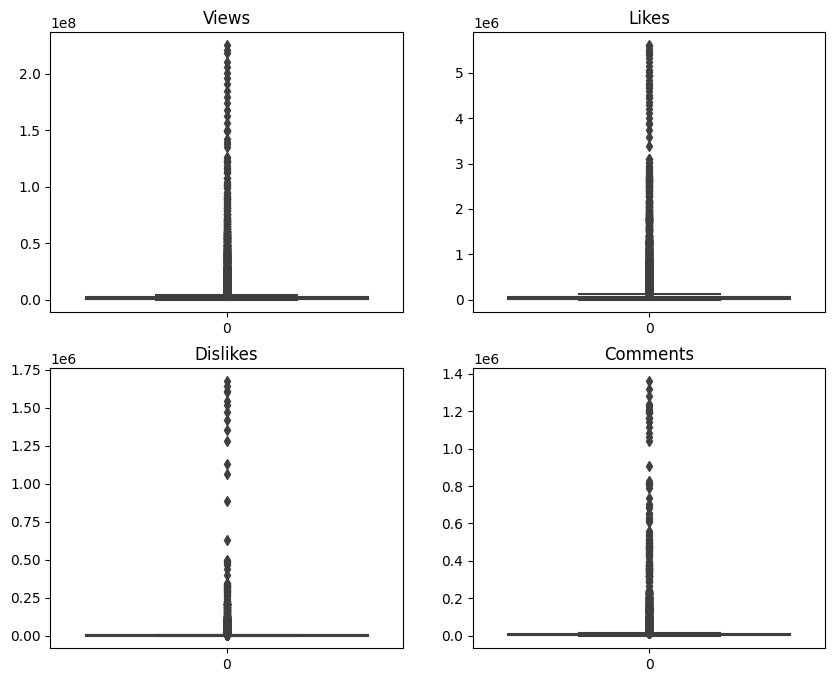

In [27]:
fig, axes = plt.subplots(2,2,figsize = (10,8))
sns.boxplot(df['views'], ax=axes[0,0])
sns.boxplot(df['likes'], ax=axes[0,1])
sns.boxplot(df['dislikes'], ax=axes[1,0])
sns.boxplot(df['comment_count'], ax=axes[1,1])

axes[0,0].set_title('Views')
axes[0,1].set_title('Likes')
axes[1,0].set_title('Dislikes')
axes[1,1].set_title('Comments')

plt.show()

Outlier pada Views

In [28]:
Q1 = df['views'].quantile(0.25)
Q3 = df['views'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 1580828.0


In [82]:
print('outlier views')

upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['views'] > upper]
upper_len = len(df_upper)

df_lower = df[df['views'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')
print(f'Persen outlier: {upper_len/df.shape[0]*100}')

outlier views
Upper outlier: 13466.5
Lower outlier: -7097.5
jumlah upper outlier: 39877 
jumlah lower outlier: 0
Persen outlier: 97.3821094532223


Outlier pada Likes

In [30]:
Q1 = df['likes'].quantile(0.25)
Q3 = df['likes'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 49993.0


In [84]:
print('outlier likes')

upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['likes'] > upper]
upper_len = len(df_upper)

df_lower = df[df['likes'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')
print(f'Persen outlier: {upper_len/df.shape[0]*100}')

outlier likes
Upper outlier: 13466.5
Lower outlier: -7097.5
jumlah upper outlier: 23351 
jumlah lower outlier: 0
Persen outlier: 57.02459156511759


Outlier pada Dislikes

In [32]:
Q1 = df['dislikes'].quantile(0.25)
Q3 = df['dislikes'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 1736.0


In [83]:
print('outlier dislikes')

upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['dislikes'] > upper]
upper_len = len(df_upper)

df_lower = df[df['dislikes'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')
print(f'Persen outlier: {upper_len/df.shape[0]*100}')

outlier dislikes
Upper outlier: 13466.5
Lower outlier: -7097.5
jumlah upper outlier: 1757 
jumlah lower outlier: 0
Persen outlier: 4.290703069672031


Outlier pada comment_counts

In [34]:
Q1 = df['comment_count'].quantile(0.25)
Q3 = df['comment_count'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 5141.0


In [85]:
print('outlier comment')

upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['comment_count'] > upper]
upper_len = len(df_upper)

df_lower = df[df['comment_count'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')
print(f'Persen outlier: {upper_len/df.shape[0]*100}')

outlier comment
Upper outlier: 13466.5
Lower outlier: -7097.5
jumlah upper outlier: 5089 
jumlah lower outlier: 0
Persen outlier: 12.427653910962416


**Kesimpulan**
- Pada variabel Views, mempunyai sebanyak 4499 outlier atau sebesar **10.98%**
- Pada variabel Likes, mempunyai sebanyak 5136 outlier atau sebesar **12.54%**
- Pada variabel Dislikes, mempunyai sebanyak 5288 outlier atau sebesar **12.91%**
- Pada variabel Comment count, mempunyai sebanyak 5089 outlier atau sebesar **12.42%**
- **Dalam dataset ini, terlihat terdapat outlier sebesar 10%-12% dan terbilang sangat banyak sekali outlier yang ada**

Bisa dilihat bahwa pada dataset ini terdapat banyak sekali outlier, hal ini mungkin disebabkan karena jauhnya perbedaan nilai views, likes, dislikes, dan jumlah comment.

# Melihat kategori dari video

Melihat jumlah dari masing-masing kategori video yang ada 

In [36]:
category_order = pd.DataFrame(df.groupby(["category"])["title"].agg("nunique").sort_values(ascending=False))
category_order

,title
category,
Entertainment,1645
Music,821
How to and Style,602
Comedy,551
News and Politics,513
People and Blogs,505
Sport,458
Science and Technology,391
Film and Animation,323


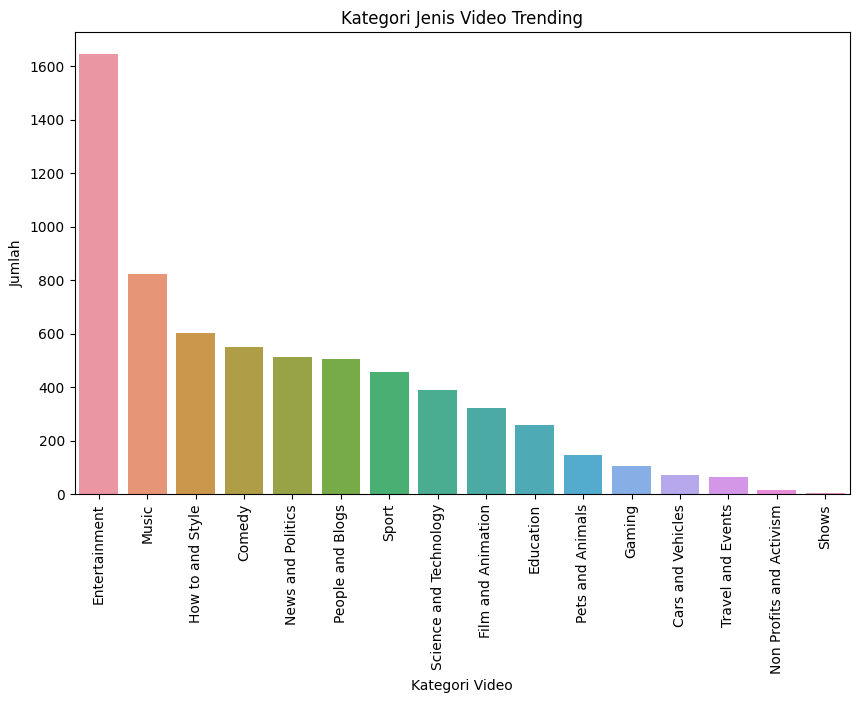

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x=category_order.index, y=category_order['title'])
plt.title('Kategori Jenis Video Trending')
plt.xlabel('Kategori Video')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()
# print(kategori)

In [38]:
df['title'].nunique()

6455

Dapat dilihat bahwa 5 kategori video yang paling banyak trending di youtube adalah entertainment, disusul dengan musik, how to and style, comedy, dan news and politics. Kemudian, kategori dengan video yang trending paling sedikit adalah non profits and activism dan shows.

# Melihat video yang memiliki disabled comments, disabled ratings, video errors or removed dan no description

In [39]:
freq_comment = df.groupby(["comments_disabled"])["title"].agg("nunique").sort_values(ascending=False)
freq_rating = df.groupby(["ratings_disabled"])["title"].agg("nunique")
freq_vid_err = df.groupby(["video_error_or_removed"])["title"].agg("nunique")
freq_desc = df.groupby(["no_desc"])["title"].agg("nunique")

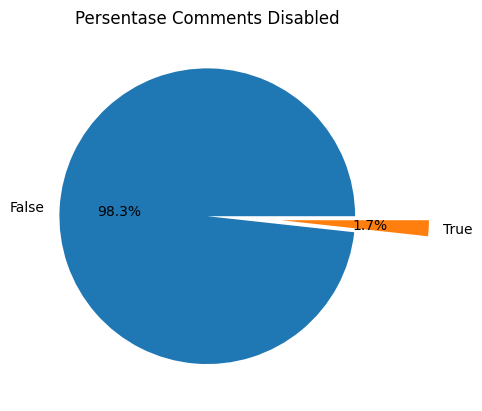

comments_disabled
False    6350
True      112
Name: title, dtype: int64


In [40]:
explode = (0, 0.5)

fig, axes = plt.subplots() 
axes.pie(freq_comment, explode = explode, labels=freq_comment.index, autopct='%1.1f%%')
plt.title('Persentase Comments Disabled')
plt.show()
print(freq_comment)

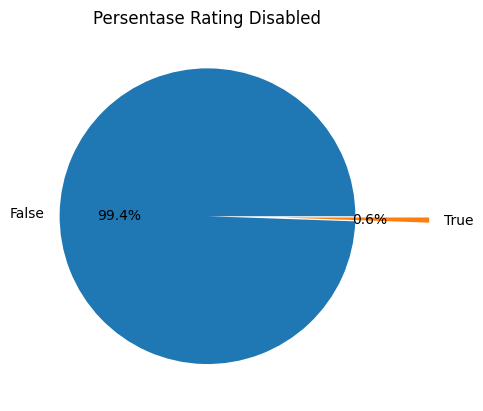

ratings_disabled
False    6427
True       36
Name: title, dtype: int64


In [41]:
fig, axes = plt.subplots() 
axes.pie(freq_rating, explode = explode, labels=freq_rating.index, autopct='%1.1f%%')
plt.title('Persentase Rating Disabled')
plt.show()
print(freq_rating)

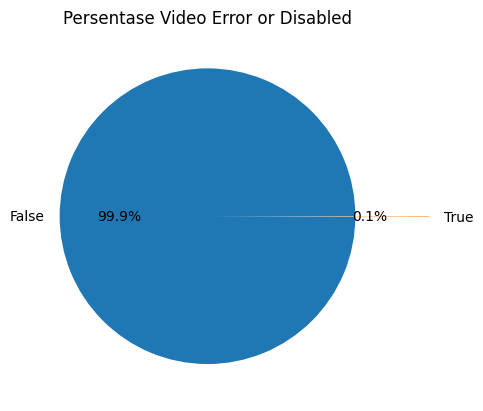

video_error_or_removed
False    6451
True        4
Name: title, dtype: int64


In [42]:
fig, axes = plt.subplots() 
axes.pie(freq_vid_err, explode = explode, labels=freq_vid_err.index, autopct='%1.1f%%')
plt.title('Persentase Video Error or Disabled')
plt.show()
print(freq_vid_err)

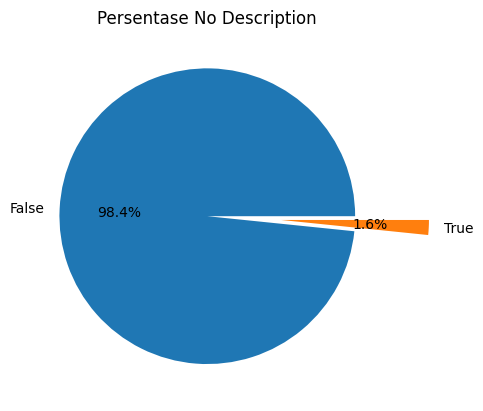

no_desc
False    6357
True      105
Name: title, dtype: int64


In [43]:
fig, axes = plt.subplots() 
axes.pie(freq_desc, explode = explode, labels=freq_desc.index, autopct='%1.1f%%')
plt.title('Persentase No Description')
plt.show()
print(freq_desc)

Berdasarkan analisa diatas, video trending yang komentarnya dimatikan ada 112 atau sebesar 1.7%. Kemudian ada 36 atau 0.6% video yang ratings-nya di non aktifkan. Untuk video error or disabled, terdapat 4 atau 0.1%. Yang terakhir, video yang tidak mempunyai deskripsi ada 105 atau 1.6%.

# EDA Berdasarkan Views, Likes, Dislikes, dan Comments dari video trending di YouTube

**Berdasarkan Category**

In [44]:
cat_views = df.groupby('category')[['views']].sum().sort_values(by='views', ascending=False)
cat_likes = df.groupby('category')[['likes']].sum().sort_values(by='likes', ascending=False)
cat_dis = df.groupby('category')[['dislikes']].sum().sort_values(by='dislikes', ascending=False)
cat_comment = df.groupby('category')[['comment_count']].sum().sort_values(by='comment_count', ascending=False)

In [45]:
result_cat = pd.concat([cat_views, cat_likes, cat_dis, cat_comment], axis = 1)
result_cat

,views,likes,dislikes,comment_count
category,,,,
Music,40132892190,1416838584,51179008,125296396
Entertainment,20604388195,530516491,42987663,73566498
Film and Animation,7284156721,165997476,6075148,17887060
Comedy,5117426208,216346746,7230391,22545582
People and Blogs,4917191726,186615999,10187901,24778032
Sport,4404456673,98621211,5133551,11192155
How to and Style,4078545064,162880075,5473899,23149550
Science and Technology,3487756816,82532638,4548402,11989926
Gaming,2141218625,69038284,9184466,14740713


In [46]:
#display(cat_views, cat_likes, cat_dis, cat_comment)

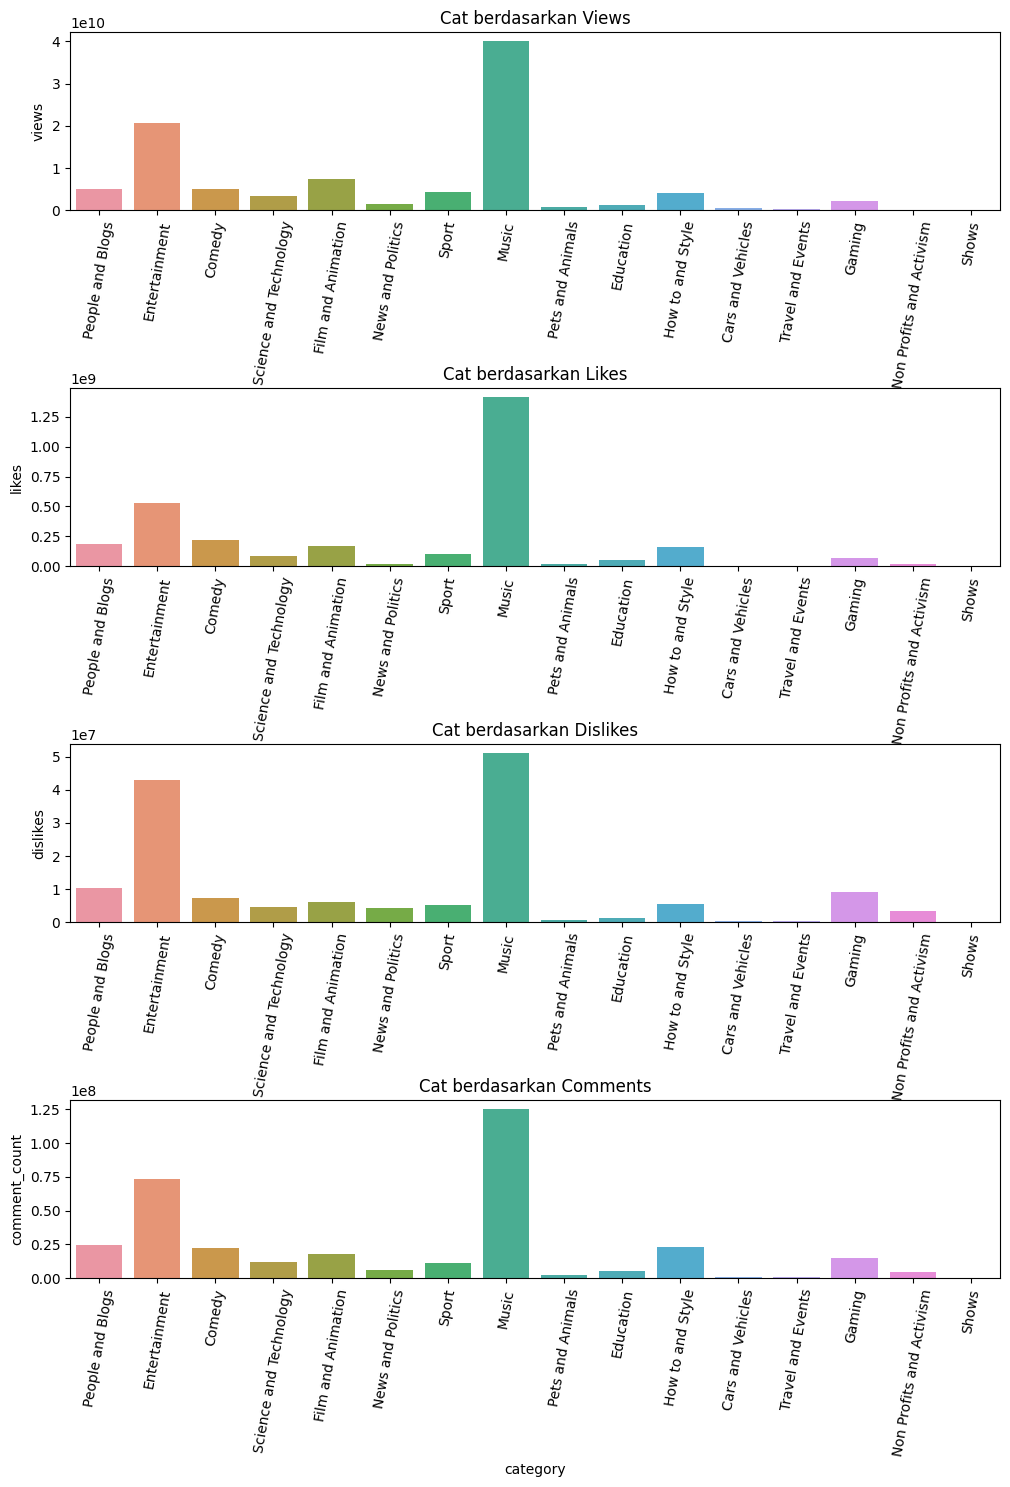

In [47]:
fig, axes = plt.subplots(4,1,figsize = (12,14))

sns.barplot(x='category', y='views', data=df, estimator='sum', errorbar=None, ax=axes[0])
sns.barplot(x='category', y='likes', data=df, estimator='sum', errorbar=None, ax=axes[1])
sns.barplot(x='category', y='dislikes', data=df, estimator='sum', errorbar=None, ax=axes[2])
sns.barplot(x='category', y='comment_count', data=df, estimator='sum', errorbar=None, ax=axes[3])

axes[0].set_title('Cat berdasarkan Views')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)
axes[1].set_title('Cat berdasarkan Likes')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=80)
axes[2].set_title('Cat berdasarkan Dislikes')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=80)
axes[3].set_title('Cat berdasarkan Comments')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=80)
plt.subplots_adjust(hspace=1, top = 1)
plt.show()

Kesimpulan:
- Video dengan kategori music mempunyai views, like, dislike, dan comment paling banyak
- Kategori entertainment menduduki posisi kedua yang paling banyak mempunyai views, like, dislike dan comment
- Bisa dilihat bahwa kategori Non Profits dan Show mempunyai views yang paling sedikit jika dibandingkan dengan kategori lain
- Show juga mempunyai likes, dislikes, dan comment yang paling sedikit jumlahnya (hal ini bisa disebabkan oleh adanya ratings disabled dan comments disabled)

**Berdasarkan Channel**

In [48]:
channel_views = df.groupby('channel_title')[['views']].sum().sort_values(by='views', ascending=False).head(10)
channel_likes = df.groupby('channel_title')[['likes']].sum().sort_values(by='likes', ascending=False).head(10)
channel_dislikes = df.groupby('channel_title')[['dislikes']].sum().sort_values(by='dislikes', ascending=False).head(10)
channel_comment = df.groupby('channel_title')[['comment_count']].sum().sort_values(by='comment_count', ascending=False).head(10)

In [49]:
display(channel_views, channel_likes, channel_dislikes, channel_comment)

,views
channel_title,
ChildishGambinoVEVO,3758488765
ibighit,2235906679
Dude Perfect,1870085178
Marvel Entertainment,1808998971
ArianaGrandeVevo,1576959172
MalumaVEVO,1551515831
jypentertainment,1486972132
Sony Pictures Entertainment,1432374398
FoxStarHindi,1238609854


,likes
channel_title,
ibighit,199247121
ChildishGambinoVEVO,96700818
Dude Perfect,60275557
Marvel Entertainment,55873344
ArianaGrandeVevo,52170970
jypentertainment,44900910
TaylorSwiftVEVO,39292840
Ed Sheeran,39279211
ZaynVEVO,31695245


,dislikes
channel_title,
Logan Paul Vlogs,13847251
YouTube Spotlight,10924092
ChildishGambinoVEVO,6054434
Call of Duty,5644083
ibighit,3467306
jypentertainment,2482131
TaylorSwiftVEVO,2127542
ArianaGrandeVevo,1931230
MalumaVEVO,1757948


,comment_count
channel_title,
ibighit,31817464
Logan Paul Vlogs,14870370
ChildishGambinoVEVO,10151289
jypentertainment,7575510
YouTube Spotlight,6495154
Marvel Entertainment,6453560
Safiya Nygaard,4419873
ArianaGrandeVevo,4295333
Call of Duty,4224430


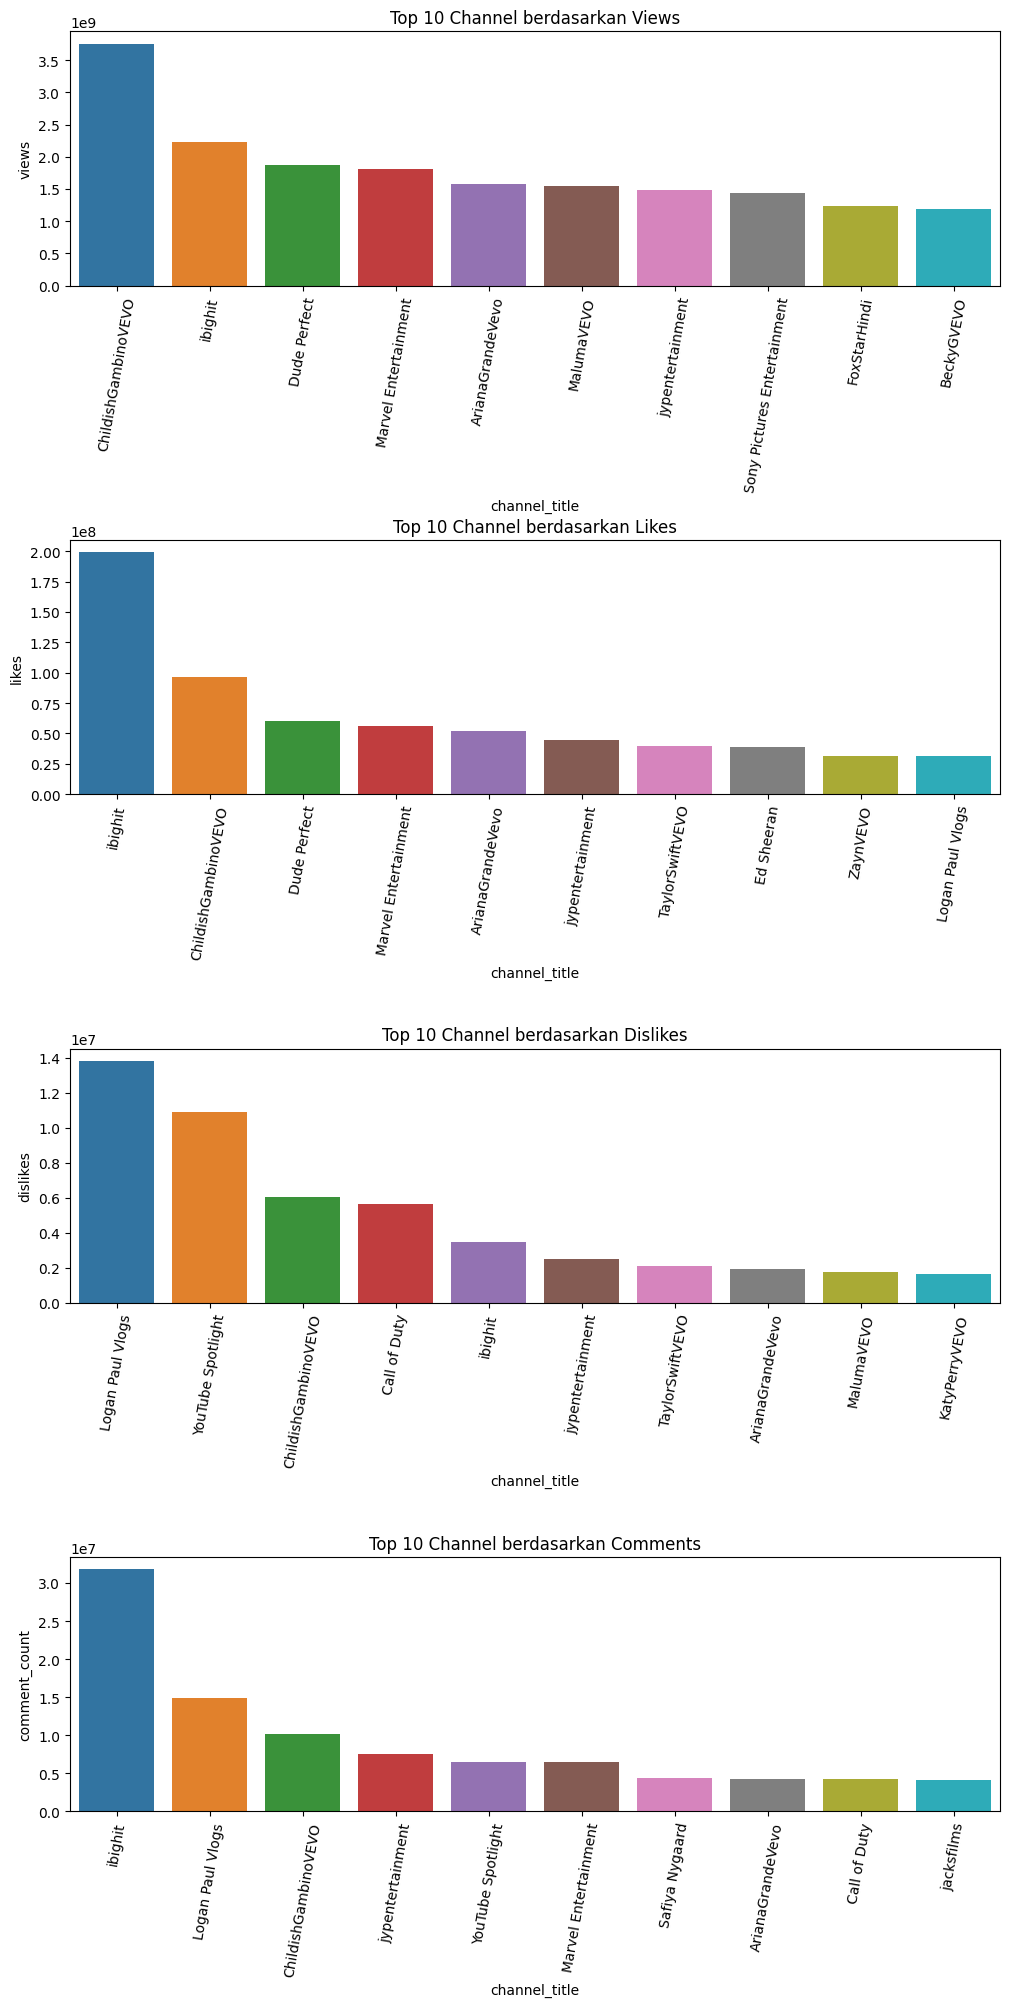

In [86]:
fig, axes = plt.subplots(4,1,figsize = (12,20))

sns.barplot(x=channel_views.index, y='views', data=channel_views, estimator='sum', errorbar=None, ax=axes[0])
sns.barplot(x=channel_likes.index, y='likes', data=channel_likes, estimator='sum', errorbar=None, ax=axes[1])
sns.barplot(x=channel_dislikes.index, y='dislikes', data=channel_dislikes, estimator='sum', errorbar=None, ax=axes[2])
sns.barplot(x=channel_comment.index, y='comment_count', data=channel_comment, estimator='sum', errorbar=None, ax=axes[3])

axes[0].set_title('Top 10 Channel berdasarkan Views')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)
axes[1].set_title('Top 10 Channel berdasarkan Likes')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=80)
axes[2].set_title('Top 10 Channel berdasarkan Dislikes')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=80)
axes[3].set_title('Top 10 Channel berdasarkan Comments')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=80)
plt.subplots_adjust(hspace=1, top = 1)
plt.show()

**Kesimpulan**
- Channel dengan views terbanyak adalah ChildishGambinoVEVO
- Likes terbanyak adalah channel Ibighit (category music)
- Dislikes terbanyak adalah Logan Paul Vlogs
- Comment terbanyak adalah Ibighit

Melihat Video dengan views, likes, dislikes, dan comment terbanyak

In [51]:
vid_views = df.groupby('title')[['views']].max().sort_values(by='views', ascending=False).head(10)
vid_likes = df.groupby('title')[['likes']].max().sort_values(by='likes', ascending=False).head(10)
vid_dis = df.groupby('title')[['dislikes']].max().sort_values(by='dislikes', ascending=False).head(10)
vid_comment = df.groupby('title')[['comment_count']].max().sort_values(by='comment_count', ascending=False).head(10)

display(vid_views, vid_likes, vid_dis, vid_comment)

,views
title,
Childish Gambino - This Is America (Official Video),225211923
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,149376127
Ariana Grande - No Tears Left To Cry,148689896
"Becky G, Natti Natasha - Sin Pijama (Official Video)",139334502
BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920
The Weeknd - Call Out My Name (Official Video),122544931
"Luis Fonsi, Demi Lovato - Échame La Culpa",102012605
"Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]",94254507
Marvel Studios' Avengers: Infinity War Official Trailer,91933007


,likes
title,
BTS (방탄소년단) 'FAKE LOVE' Official MV,5613827
Childish Gambino - This Is America (Official Video),5023450
Ariana Grande - No Tears Left To Cry,3094021
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,3093544
BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV,2729292
BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' Comeback Trailer,2700800
j-hope 'Daydream (백일몽)' MV,2672431
Marvel Studios' Avengers: Infinity War Official Trailer,2625661
Maroon 5 - Girls Like You ft. Cardi B,2488565


,dislikes
title,
So Sorry.,1674420
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,1643059
Suicide: Be Here Tomorrow.,497847
Childish Gambino - This Is America (Official Video),343541
LOGAN PAUL IS BACK!,291900
PSA from Chairman of the FCC Ajit Pai,228426
Official Call of Duty®: Black Ops 4 — Multiplayer Reveal Trailer,212976
BTS (방탄소년단) 'FAKE LOVE' Official MV,206892
Fergie Performs The U.S. National Anthem / 2018 NBA All-Star Game,176903


,comment_count
title,
So Sorry.,1361580
BTS (방탄소년단) 'FAKE LOVE' Official MV,1228655
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,827755
Suicide: Be Here Tomorrow.,658130
BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV,546100
Childish Gambino - This Is America (Official Video),517232
j-hope 'Daydream (백일몽)' MV,477233
LOGAN PAUL IS BACK!,436698
Melting Every Lipstick From Sephora Together,383762


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) mi

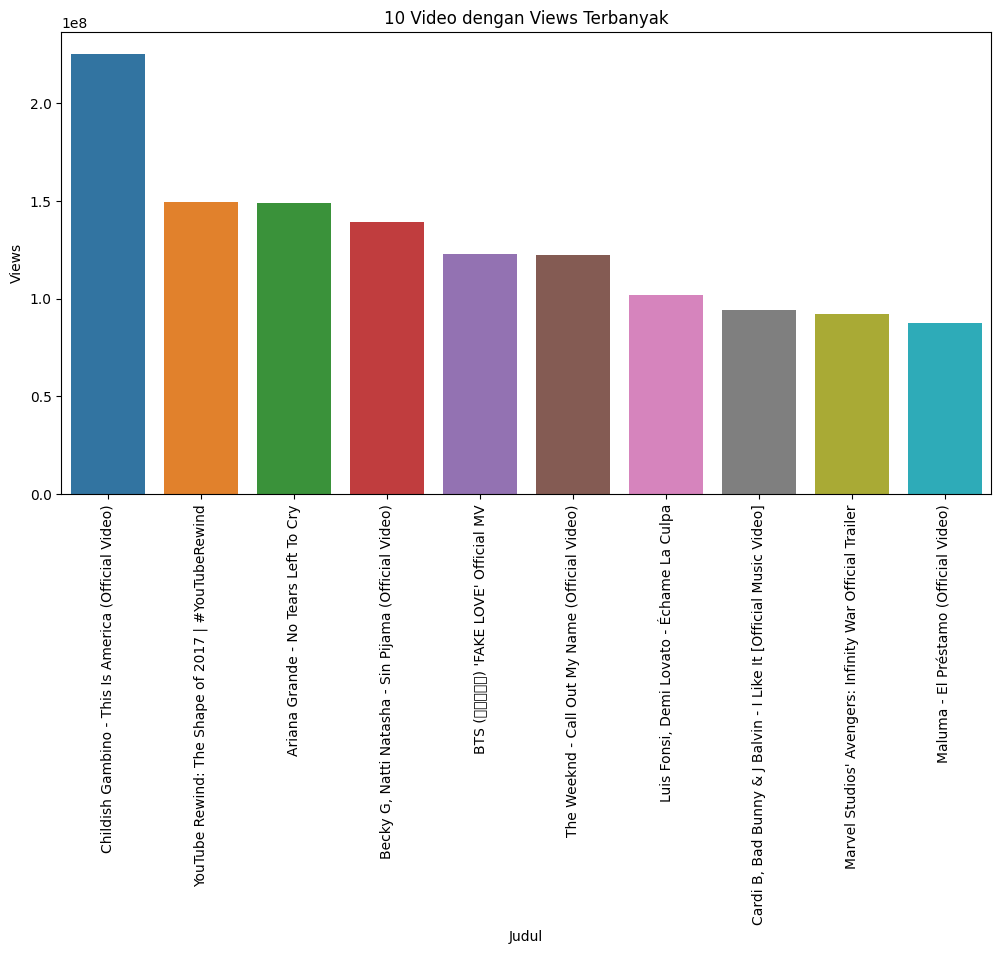

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x=vid_views.index, y='views', data= vid_views)
plt.title('10 Video dengan Views Terbanyak')
plt.xlabel('Judul')
plt.ylabel('Views')
plt.xticks(rotation=90)
# plt.yticks(range(50))
plt.show()

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) mi

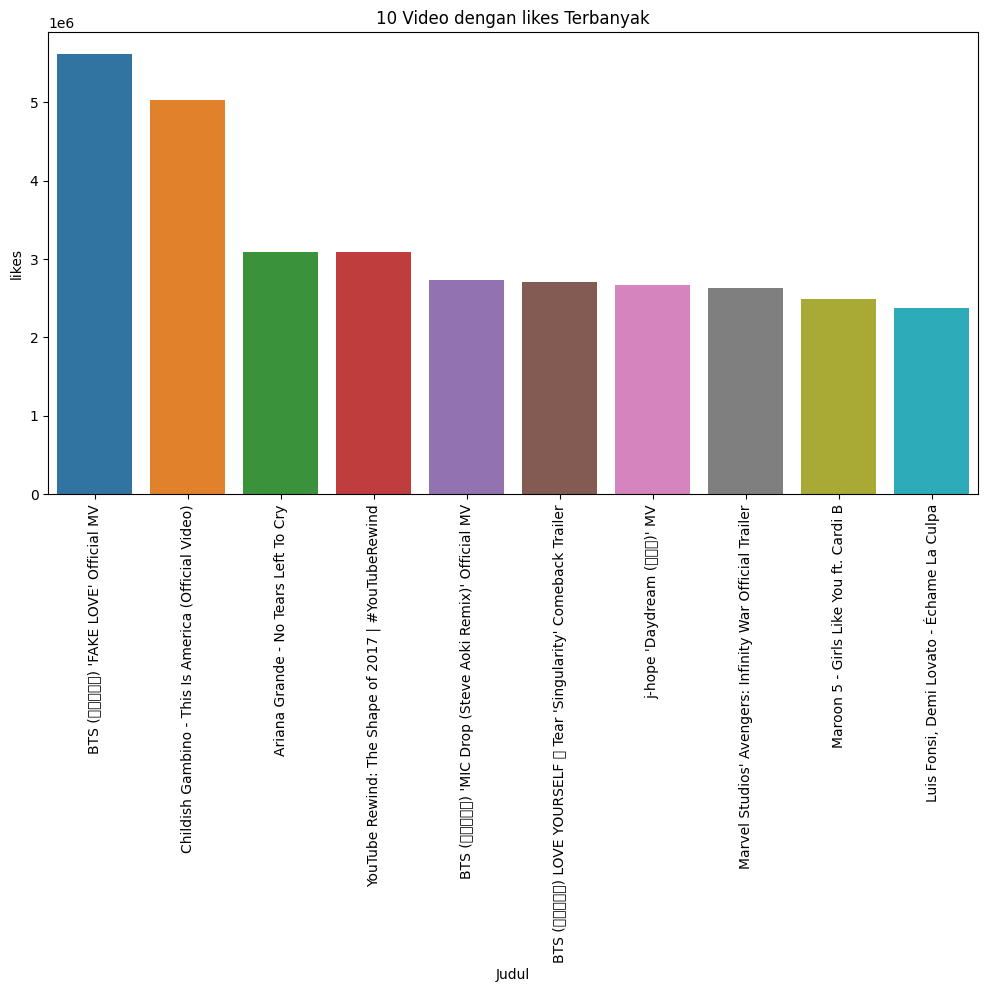

In [53]:
# plot top 10 liked videos
plt.figure(figsize=(12,6))
sns.barplot(x=vid_likes.index, y='likes', data= vid_likes)
plt.title('10 Video dengan likes Terbanyak')
plt.xlabel('Judul')
plt.ylabel('likes')
plt.xticks(rotation=90)
# plt.yticks(range(50))
plt.show()

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) mi

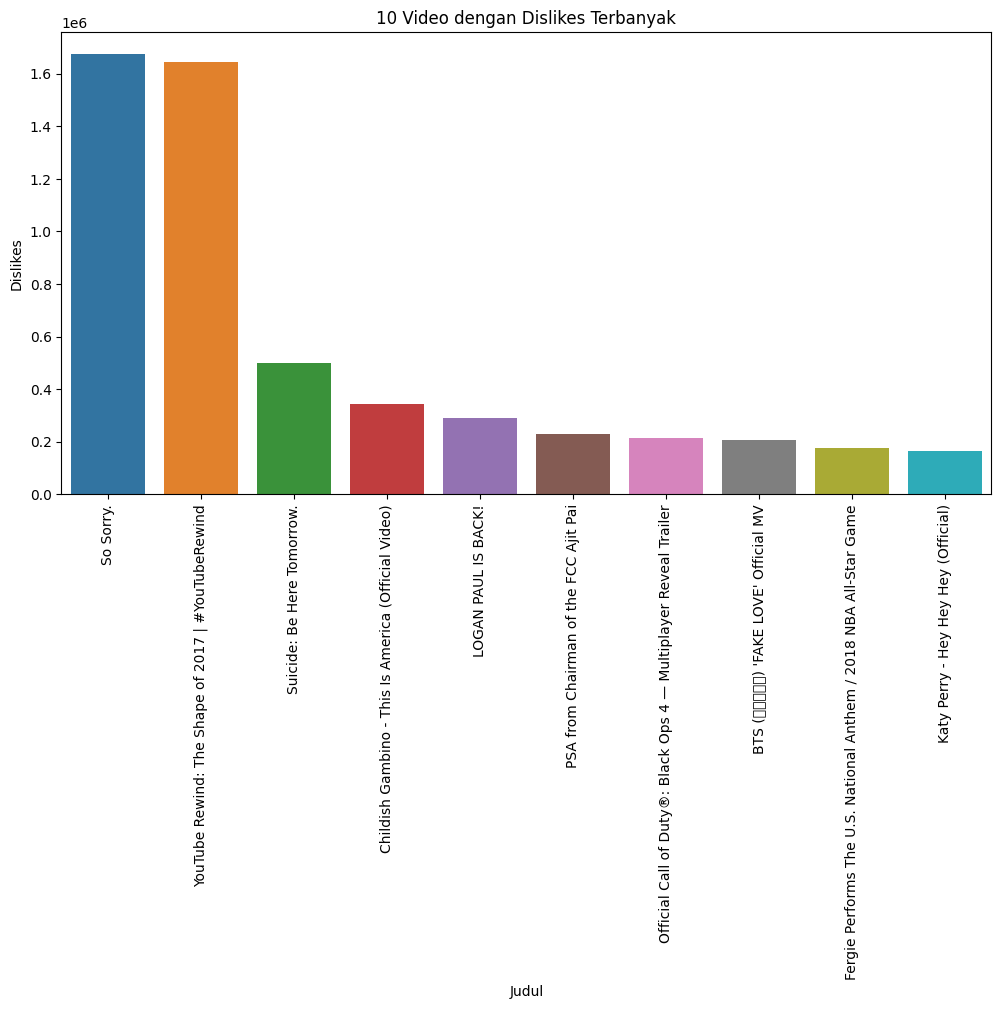

In [54]:
# plot top 10 disliked videos
plt.figure(figsize=(12,6))
sns.barplot(x=vid_dis.index, y='dislikes', data= vid_dis)
plt.title('10 Video dengan Dislikes Terbanyak')
plt.xlabel('Judul')
plt.ylabel('Dislikes')
plt.xticks(rotation=90)
# plt.yticks(range(50))
plt.show()

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) mi

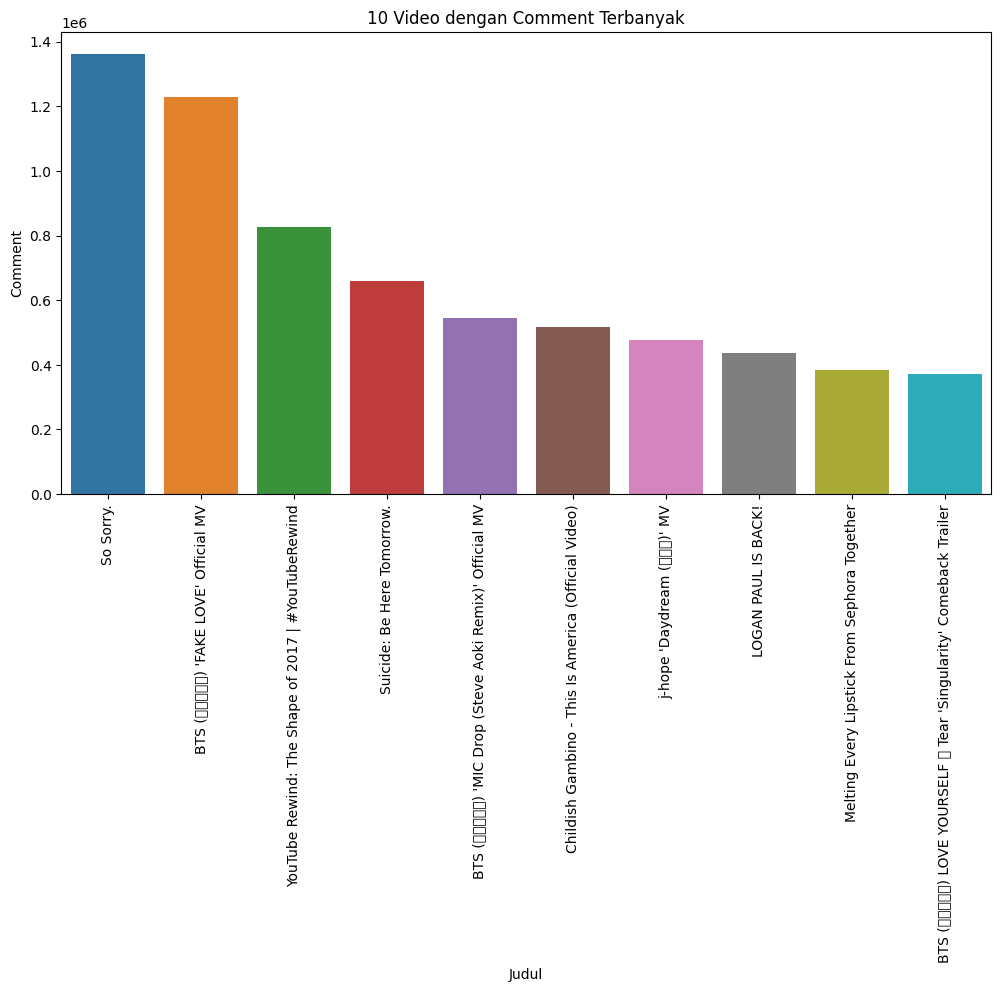

In [55]:
# plot top 10 commented videos
plt.figure(figsize=(12,6))
sns.barplot(x=vid_comment.index, y='comment_count', data= vid_comment)
plt.title('10 Video dengan Comment Terbanyak')
plt.xlabel('Judul')
plt.ylabel('Comment')
plt.xticks(rotation=90)
# plt.yticks(range(50))
plt.show()

**Kesimpulan**
- Dapat dilihat bahwa dua video paling banyak dislikes adalah yang berkategori entertainment. Yang pertama Video Logan Paul yang berjudul So Sorry dan yang kedua adalah YouTube Rewind
- Video trending yang mempunyai views dan likes paling banyak di dominasi oleh music video.

# Melihat banyaknya tags, kata dalam judul, dan kata dalam description yang digunakan dalam video

**Tags**

In [56]:
# Membuat kolom dengan count tags
df['jumlah_tags'] = df['tags'].str.count('\|') + 1
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,no_desc,category,publish_date,jumlah_tags
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,False,People and Blogs,2017-11-13,1
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,"One year after the presidential election, John...",False,Entertainment,2017-11-13,4


In [57]:
vid_tags = df.groupby('title')[['jumlah_tags','views']].sum().sort_values(by='jumlah_tags', ascending=False).head(5)
vid_tags

,jumlah_tags,views
title,,
Why I'm So Scared (being myself and crying too much),1363,100805352
Rooster Teeth Animated Adventures - Millie So Serious,1334,19669491
Just Like You Left It,1125,14085784
We Bought A House,1107,86285744
"The ULTIMATE $30,000 Gaming PC Setup",1073,180298908


In [58]:
count_tags = df['tags'].str.split('\|',expand=True).stack().value_counts()
count_tags.head(10)

"funny"      3584
"comedy"     2863
"how to"     1560
[none]       1535
"Pop"        1273
"2018"       1251
"music"      1221
"humor"      1171
"food"       1134
"science"    1087
dtype: int64

**Berdasarkan Judul Video**

In [59]:
df['title_split'] = df['title'].str.split()
title_exploded = df['title_split'].explode()
most_word = title_exploded.value_counts(ascending=False)
most_word.head(20)

-            11452
|            10663
The           5762
the           3610
a             2566
to            2343
of            2338
in            2176
A             2122
&             2024
I             1940
and           1917
Video)        1901
Trailer       1868
How           1661
with          1655
2018          1613
(Official     1594
Official      1554
on            1552
Name: title_split, dtype: int64

**Berdasarkan Description**

In [60]:
df['desc_count'] = df['description'].str.count(' ') + 1
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,no_desc,category,publish_date,jumlah_tags,title_split,desc_count
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,False,People and Blogs,2017-11-13,1,"[WE, WANT, TO, TALK, ABOUT, OUR, MARRIAGE]",136
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,"One year after the presidential election, John...",False,Entertainment,2017-11-13,4,"[The, Trump, Presidency:, Last, Week, Tonight,...",80


In [61]:
desc = df.groupby('title')[['desc_count','views']].sum().sort_values(by='desc_count', ascending=False).head(5)
desc

,desc_count,views
title,,
"Why You Should Wake Up at 4:30 AM Every Day, According To A Navy SEAL",20628,96489336
How Ticks Dig In With a Mouth Full of Hooks | Deep Look,11415,14884759
Sam Smith - Pray (Official Video) ft. Logic,11066,363345114
Liam Payne & J Balvin - Familiar (Official Video),9780,354880801
THE GREEN MAKEUP CHALLENGE! | NikkieTutorials,9666,69145777


Berdasarkan analisa di atas: 
- Banyak video trending yang menggunakan banyak sekali tag. Tag yang paling sering dingunakan adalah tag funny, comedy dan how to.
- Kebanyakan video yang trending menggunakan kata Video, Trailer, dan How pada judulnya.

# Melihat korelasi antara variabel numerik

In [62]:
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,no_desc,category,publish_date,jumlah_tags,title_split,desc_count
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,False,People and Blogs,2017-11-13,1,"[WE, WANT, TO, TALK, ABOUT, OUR, MARRIAGE]",136
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,"One year after the presidential election, John...",False,Entertainment,2017-11-13,4,"[The, Trump, Presidency:, Last, Week, Tonight,...",80


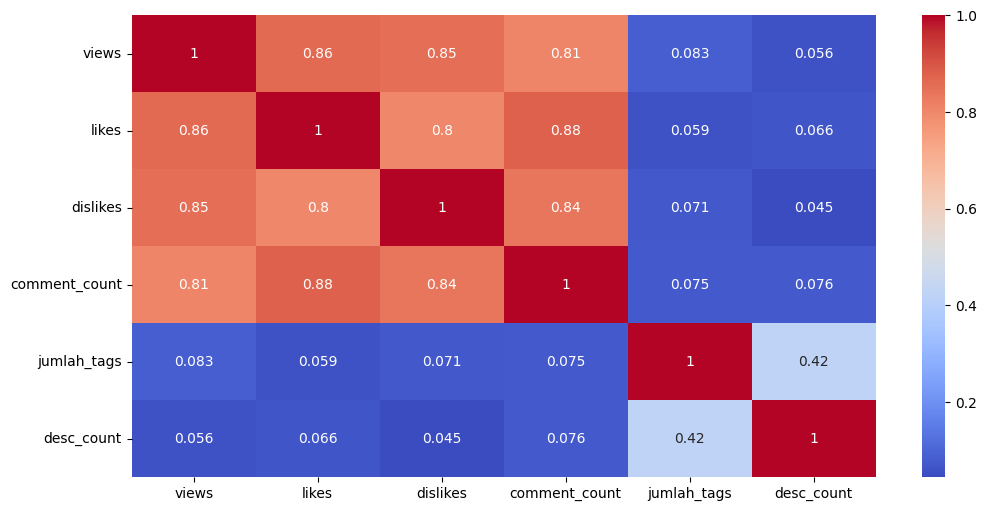

In [63]:
corr = df[['views', 'likes', 'dislikes', 'comment_count', 'jumlah_tags', 'desc_count']].corr(method='spearman')

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

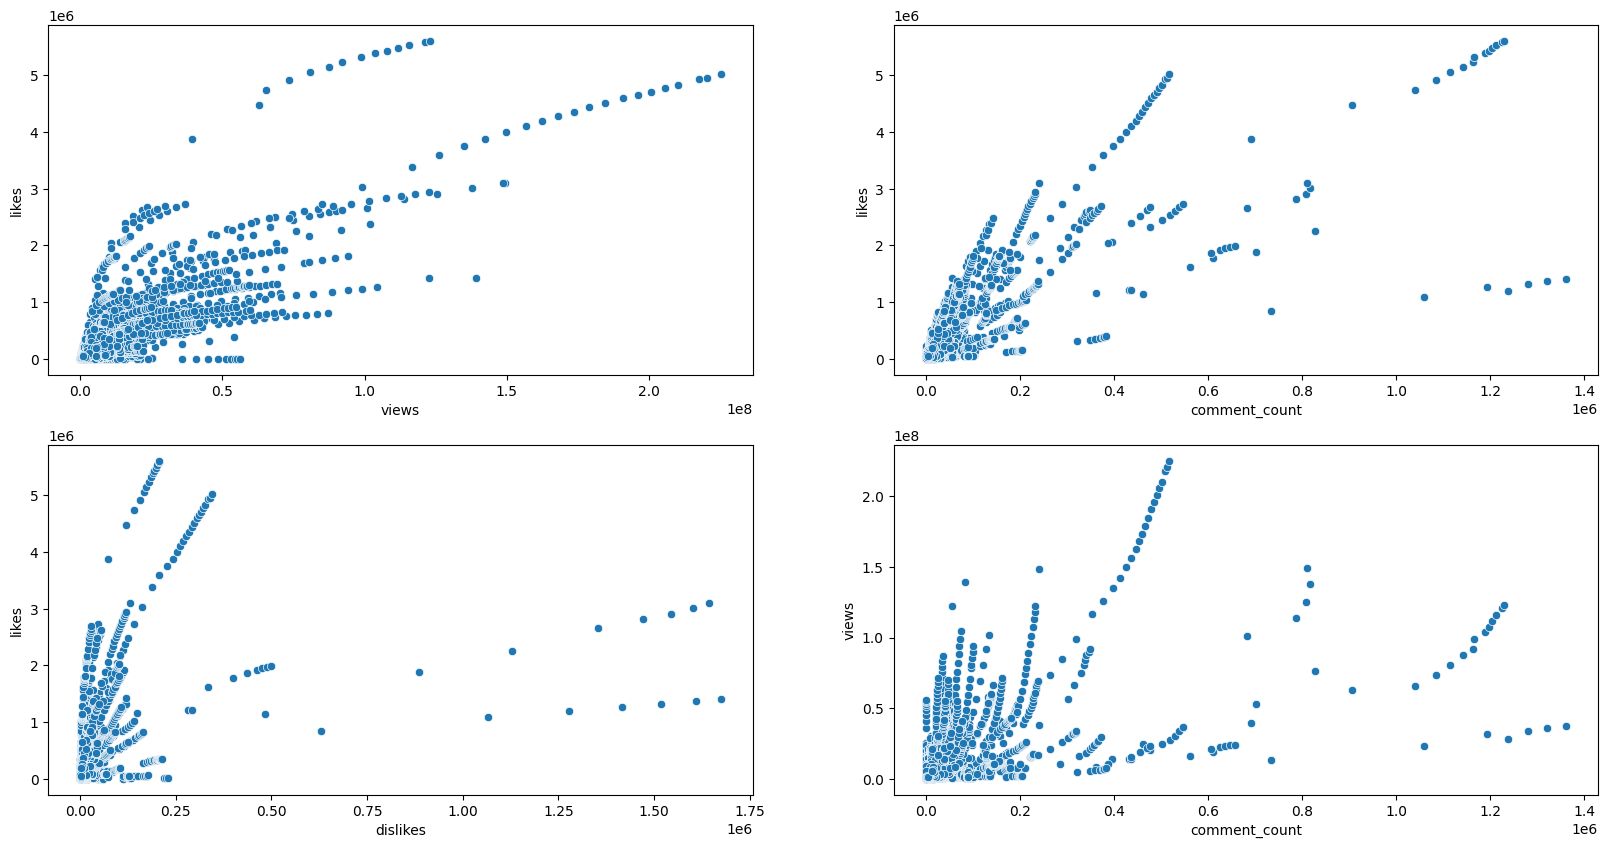

In [64]:
f,ax=plt.subplots(2,2,figsize=(20,10))

sns.scatterplot(x='views',y='likes', data=df, ax=ax[0][0])
sns.scatterplot(x='comment_count',y='likes', data=df, ax=ax[0][1])
sns.scatterplot(x='dislikes',y='likes', data=df, ax=ax[1][0])
sns.scatterplot(x='comment_count',y='views', data=df, ax=ax[1][1])

plt.show()

Ternyata Views, Likes, Dislikes, dan Comment saling mempunyai korelasi yang kuat terhadap satu sama lainnya. Korelasi antara Likes dan Dislikes pun mempunyai korelasi yang kuat. Hal ini terbilang aneh yang dimana Likes dan Dislikes seharusnya bertolak belakang.

Untuk variabel seperti Jumlah Tags, Title count, dan Desc Count, tidak mempunyai korelasi terhadap variabel lainnya. Hal ini berarti bahwa dari ketiga variabel tersebut, tidak mempengaruhi Views, Likes, Dislikes, dan Comment dari video. Seperti yang sudah dilihat pada bagian jumlah tags, title count, dan desc count, memang jika dilihat banyak video trending yang memiliki views yang menggunakan judul, tags, dan juga deskripsi yang sangat banyak dan panjang sehingga tidak berpengaruh terhadap views dari video.

# Analisa Berdasarkan Waktu

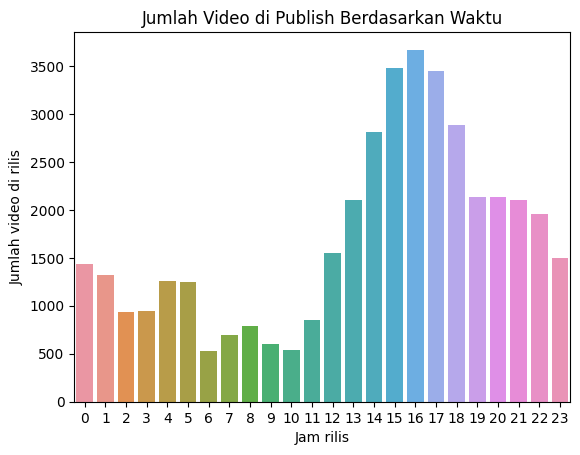

3669

In [65]:
publish_hour = df['publish_time'].dt.hour.value_counts()

sns.barplot(x=publish_hour.index, y=publish_hour.values)
plt.xlabel('Jam rilis')
plt.ylabel('Jumlah video di rilis')
plt.title('Jumlah Video di Publish Berdasarkan Waktu')
plt.show()
publish_hour.max()

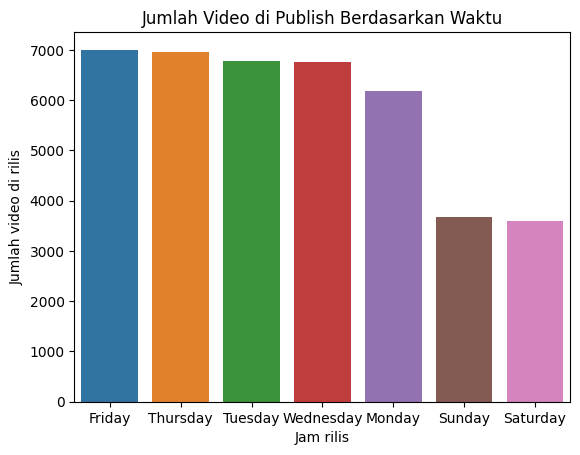

7002

In [66]:
publish_date = df['publish_time'].dt.day_name().value_counts()

sns.barplot(x=publish_date.index, y=publish_date.values)
plt.xlabel('Jam rilis')
plt.ylabel('Jumlah video di rilis')
plt.title('Jumlah Video di Publish Berdasarkan Waktu')
plt.show()
publish_date.max()

Kemudian kita juga ingin tahu apakah rata-rata views pada hari weekend dan weekdays tidak sama. Oleh karena itu kita lihat perbedaan rata-ratanya
- H0: Rata-rata views pada weekend sama dengan views pada weekdays
- Ha: Rata-rata views pada weekend tidak sama dengan views pada weekdays

In [67]:
df['days_up'] = df['publish_time'].apply(lambda x: 'weekend' if x.weekday() >= 5 else 'weekday')

In [68]:
from scipy.stats import mannwhitneyu

stat, pvalue = list(mannwhitneyu(
    df[df['days_up']== 'weekend']['views'],
    df[df['days_up']== 'weekday']['views'],
    alternative = 'greater'
))

if pvalue >= 0.05:
    print(f'Terima H0 karena pvalue sebesar: {pvalue}')
else:
    print(f'Tolak H0 atau terima Ha karena pvalue sebesar: {pvalue}')

Tolak H0 atau terima Ha karena pvalue sebesar: 3.155646010996294e-11


In [69]:
rate_views = df.groupby('days_up')['views'].median()
rate_views

days_up
weekday    663376.0
weekend    755713.5
Name: views, dtype: float64

Kebanyakan video di US di upload pada siang-sore hari, dengan peaknya pada jam 16:00. Hal ini mungkin disebabkan oleh banyaknya pada rentang waktu tersebut yang membuat video yang baru di publish akan langsung mendapatkan views yang banyak.

Jika dilihat dari hari video di upload, video kebanyakan di upload pada hari senin sampai jumat, yang berarti kebanyakan video diupload pada saat weekdays atau hari kerja dengan peaknya pada hari Jumat. Hal ini juga mungkin karena pada weekend, viewers di youtube akan lebih banyak sehingga jika di upload pada hari weekend maka akan melewatkan potential viewer. Hal ini di dukung oleh adanya perbedaan views pada hari weekend dan weekdays yang signifikan.

# Melihat hubungan antara variabel no_desc dan days_up terhadap video top trending
Di sini, hubungan dari variabel no_desc (ada atau tidak ada description pada video) dan days_up (pada hari weekdays atau weekend video di upload) terhadap video top trending dilihat.

In [70]:
med_trend = df['views'].median()

Video top trend dapat dilihat dari seberapa banyak viewsnya. Dalam hal ini, video top trend dapat di pisahkan dengan yang tidak dilihat dari yang < dari mediannya yaitu yang < 681861. Oleh karena itu, dibuat kolom baru yang berisikan kategori top trend dan not.

In [71]:
df['top_trend'] = df['views'].apply(lambda x: 'top trend' if x > med_trend else 'no')

Kemudian, Dibuatlah hipotesis untuk melihat hubungan antara variabel no_desc dan target
- H0: Kedua variabel independen, atau adanya deskripsi tidak berkaitan terhadap video yang top trending
- Ha: kedua variabel dependen, atau adanya deskripsi berkaitan dengan video yang top trending

In [72]:
from scipy.stats import chi2_contingency

df_ct= pd.crosstab(df['no_desc'],df['top_trend'])
stat, p, dof, exp = chi2_contingency(df_ct)

if p >= 0.05:
    print(f'Terima H0 karena pvalue sebesar: {p} (Independen)')
else:
    print(f'Tolak H0 atau terima Ha karena pvalue sebesar: {p} (Dependen)')

Tolak H0 atau terima Ha karena pvalue sebesar: 2.0550461592622894e-25 (Dependen)


Selanjutnya, dibuat hipotesis terhadap days_up dan target
- H0: Variabel days_up tidak mempunyai kaitan dengan variabel top_trend
- Ha: Variabel days_up mempunyai kaitan dengan variabel top_trend

In [73]:
from scipy.stats import chi2_contingency

df_ct2= pd.crosstab(df['days_up'],df['top_trend'])
stat, p, dof, exp = chi2_contingency(df_ct2)

if p >= 0.05:
    print(f'Terima H0 karena pvalue sebesar: {p} (Independen)')
else:
    print(f'Tolak H0 atau terima Ha karena pvalue sebesar: {p} (Dependen)')

Tolak H0 atau terima Ha karena pvalue sebesar: 3.317804259911842e-08 (Dependen)


Dapat dilihat dari hasil chi squared test di atas, variabel no_desc mempunyai hubungan dengan variabel top trend. Begitu juga dengan variabel days_up yang juga mempunyai hubungan dengan variabel top trend. Adanya hubungan dari no_desc terhadap top trend mungkin dikarenakan video yang tidak mempunyai deskripsi terlihat membingungkan untuk melihat konteks dari video oleh para viewers yang menjadi berpengaruh terhadap trend video.

Kemudian untuk days_up memang sudah dibuktikan dari mann whitney test, rata-rata views dari video yang di upload pada hari weekend dan weekdays berbeda. Sehingga memungkinkan untuk adanya hubungan dari hari upload dengan video trending.

# Melihat video yang paling cepat trending

In [74]:
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,...,video_error_or_removed,description,no_desc,category,publish_date,jumlah_tags,title_split,desc_count,days_up,top_trend
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,False,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,False,People and Blogs,2017-11-13,1,"[WE, WANT, TO, TALK, ABOUT, OUR, MARRIAGE]",136,weekday,top trend
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,...,False,"One year after the presidential election, John...",False,Entertainment,2017-11-13,4,"[The, Trump, Presidency:, Last, Week, Tonight,...",80,weekday,top trend


Karena format data pada trending_date dan publish_time berbeda (Year-date-month dan Year-month-date), maka akan di rapihkan terlebih dahulu formattingnya.

In [75]:
df['trending_date'] = df['trending_date'].dt.strftime('%Y-%m-%d')
df['trending_date'] = pd.to_datetime(df['trending_date'], format = '%Y-%m-%d')
df['time_to_trend'] = (df['trending_date'] - df['publish_date']).dt.days

In [76]:
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,...,description,no_desc,category,publish_date,jumlah_tags,title_split,desc_count,days_up,top_trend,time_to_trend
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,False,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,False,People and Blogs,2017-11-13,1,"[WE, WANT, TO, TALK, ABOUT, OUR, MARRIAGE]",136,weekday,top trend,1
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,...,"One year after the presidential election, John...",False,Entertainment,2017-11-13,4,"[The, Trump, Presidency:, Last, Week, Tonight,...",80,weekday,top trend,1


In [77]:
df['time_to_trend'].median()

5.0

In [78]:
# Berapa persen video yang trending dalam sehari
day_percent = (df[df['time_to_trend'] <= 1].shape[0] / df.shape[0]) * 100
day_percent

7.248040245183033

In [79]:
vid_trend = df.groupby('title')[['time_to_trend','views']].min().sort_values(by='time_to_trend', ascending=True).head(10)
vid_trend

,time_to_trend,views
title,,
Bruno Mars - Finesse (Remix) [Feat. Cardi B] [Official Video],0,548621
THE CLOVERFIELD PARADOX | WATCH NOW | NETFLIX,0,643723
The Making of a Song: “Delicate” – watch more on Taylor Swift NOW,0,125645
Persil ProClean: Game-time Stain-time :30,0,8300
Descendants 3 Teaser 💚💜,0,87832
5 Seconds Of Summer - Want You Back (Audio),0,439056
The Most Beautiful Restaurant in Japan - Kyoto Kitcho,0,67025
James Corden Leads 'Subway Karaoke' During The 2018 GRAMMY Awards,0,27666
James Franco Audience Questions Monologue - SNL,0,9423


Dapat disimpulkan bahwa kebanyakan video mempunyai waktu ke trending dalam 5 hari, kemudian juga persentase video yang trending dalam satu hari kurang adalah sekitar 7%. 

**Melihat apakah ada korelasi antara variabel numerik lain dengan time to trend**

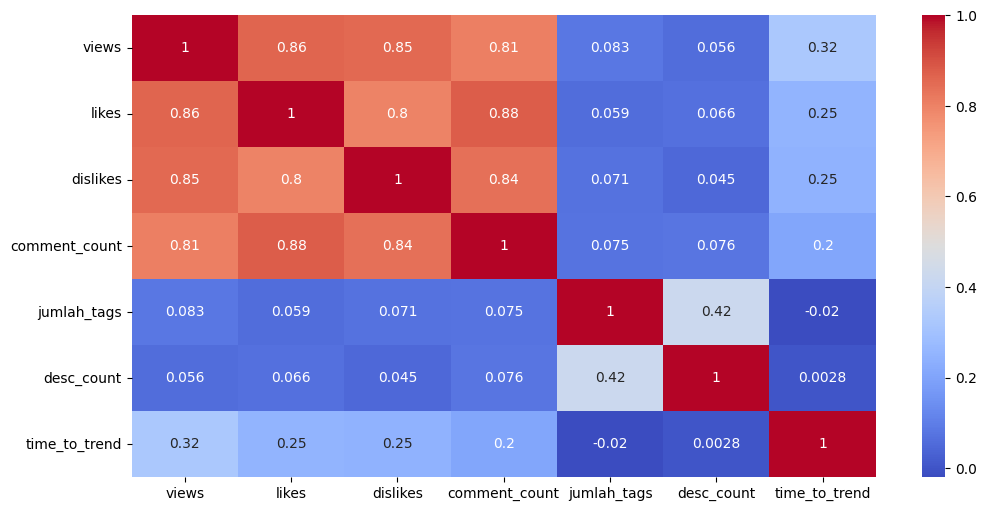

In [80]:
corr = df[['views', 'likes', 'dislikes', 'comment_count', 'jumlah_tags', 'desc_count', 'time_to_trend']].corr(method='spearman')

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Berdasarkan hasil heatmap korelasi di atas, dapat dilihat ternyata ada korelasi yang lemah dari views, likes, dislikes, dan comment_count terhadap time_to_trend, tetapi korelasi tersebut terbilang lemah. Untuk sisanya, tidak ada yang mempunyai korelasi terhadap time_to_trend.

In [81]:
# df.to_excel('youtube_clean.xlsx', index=False)

# Kesimpulan dan Saran

Dari analisa data yang sudah dilakukan tersebut, terdapat beberapa kesimpulan yang bisa diambil yaitu:
- Dari 16 kategori video yang trending, kategori entertainment merupakan kategori yang paling banyak mempunyai video trending, yaitu sekitar 1645 video
- Kebanyakan dari video trending mengaktifkan kolom komentar, rating, dan juga mempunyai deskripsi
- Kategori yang paling banyak mendapatkan views likes, dislikes, dan komentar adalah music
- Berdasarkan channel, yang mempunyai views, likes, dan komentar paling banyak kebanyakan adalah yang berkategori musik. Sedangkan untuk dislikes yang paling banyak adalah channel Logan Paul Vlogs yang berkategori entertainment.
- Kebanyakan dari video trending menggunakan banyak sekali tags
- Views, likes, dislikes, dan comment menjadi salah satu faktor trendingnya video
- Hari dan jam di uploadnya video juga berpengaruh terhadap trendingnya video
- Rata-rata waktu video trending dari pub ke trending adalah 5 hari

**Saran**
- Untuk perusahaan atau youtuber yang bergerak di bidang musik, mungkin dapat memanfaatkan platform YouTube untuk meningkatkan jumlah pendengar dan jangkauan dari lagu. Hal ini dikarenakan banyaknya musik video yang trending di YouTube.
- Meskipun jumlah tag tidak mempengaruhi views, likes, dislikes, dan comment, tetapi banyaknya tag yang digunakan dapat meningkatkan reach dari video tersebut.
    - Mungkin juga dapat menggunakan tag yang sering digunakan dalam video-video lain, seperti tag #funny, #comedy, #pop, dan yang lainnya.
- Mungkin dalam pemberian judul untuk video, dapat mempertimbangkan kata-kata yang sering muncul dalam judul video.
    - Seperti misalnya tambahkan tulisan official video, tambahkan trailer jika memang video trailer, atau yang lainnya.
- Para Youtuber juga dapat mengupload video di hari weekdays seperti pada hari jumat di rentang waktu siang-sore agar dapat memaksimalkan viewers pada weekdays dan juga weekend. Hindarkan upload video pada weekend.
- Terlepas dari analisa di atas, mungkin pertimbangkan lagi konten yang dibuat agar terhindar dari dislikes yang banyak seperti pada channel Logan Paul Videos yang mempunyai konten yang kontroversial.